In [1]:
import numpy as np
import numpy.typing as npt
from scipy.spatial.transform import Rotation
from scipy import interpolate
import matplotlib.pyplot as plt

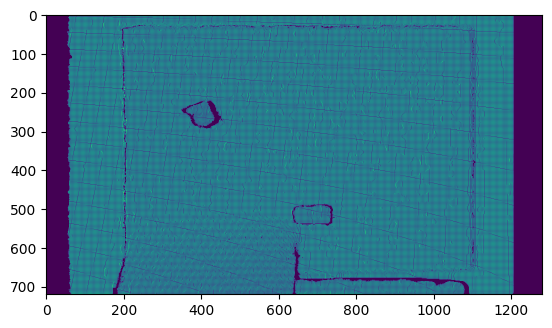

In [6]:
depth=np.load("depth.npy")
plt.imshow(depth)

(354422, 2)
(567178, 2)
(567178,)


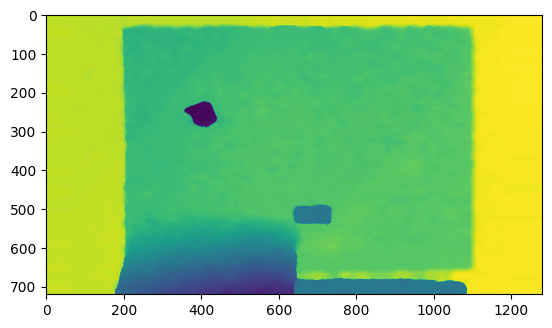

In [8]:
def restore_depth_image(depth_image):
    rows, cols = depth_image.shape
    y_coords, x_coords = np.mgrid[:rows, :cols]

    known_values = depth_image[depth_image > 0]
    known_coords = np.column_stack((x_coords[depth_image > 0], y_coords[depth_image > 0]))
    missing_coords = np.column_stack((x_coords[depth_image == 0], y_coords[depth_image == 0]))
    interpolated_values = interpolate.griddata(known_coords, known_values, missing_coords, method='nearest')

    restored_image = np.copy(depth_image)
    restored_image[depth_image == 0] = interpolated_values

    return restored_image
plt.imshow(restore_depth_image(depth))

In [9]:
depth.shape

(720, 1280)

In [10]:
720*1280

921600